<a href="https://colab.research.google.com/github/matheuslbrito/Estudos-Quants/blob/main/MLB_EDA_BANKING_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Análise exploratória de dados

### Autor: Matheus Brito                              

### Fonte de Dados:                           
https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification?select=new_train.csv

### Objetivo da base original: The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

Referência:                               
https://www.youtube.com/watch?v=AG4SwNRj5ns

##Import de libs

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Import de dados

### Metadados

In [ ]:
metadata = pd.read_excel('metadata.xlsx')

metadata

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepren..."
2,marital,"categorical,nominal","marital status ('divorced','married','single',..."
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school..."
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','teleph..."
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar..."
9,day_of_week,"categorical,ordinal","last contact day of the week ('mon','tue','wed..."


### Base treino

In [ ]:
df_banking = pd.read_csv('new_train.csv', sep = ',')

In [ ]:
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df_banking.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


## Estatística Básica

In [ ]:
# Neste primeiro aprofundamento na base, já vemos que não temos nenhuma coluna com dados faltantes
# dentro dos metadados temos a informação de que algumas colunas possuem valores definidos como 'unknown'
# que provavelmente foi a tratativa em cima dos dados faltantes (NaN)

df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
# De forma redundante ao .info() vemos que o Dataframe possui 32950 linhas e 16 colunas,
# sendo 1 coluna, a coluna da variável resposta e as demais as variáveis explicativas.

df_banking.shape

(32950, 16)

In [ ]:
# Encontramos os valores únicos para cada variável
# ao primeiro olhar vemos uma maior dispersão em 4 variáveis
# Age -> 75 idades diferentes na base de análise
# duration -> como está definido em segundos, um contato mais longo pode 
#             favorecer a conversão, além disso, se fosse contabilizado em 
#             minutos ou horas, teríamos menos variabilidade pois estaria 
#             agrupando mais clientes naquele valor
# campaign -> número de vezes que aquele cliente foi contactado dentro daquela 
#             campanha (existe mais de uma campanha na base em questão?), assim,
#             alguns clientes provavelmente foram mais assediados porque o time 
#             de negócios entendia que estavam mais propensos a serem convertidos
# pdays -> quantos dias após o último contato de uma outra campanha, assim é 
#          possível entender quantos dias tem o máximo valor, fora os ignorados

df_banking.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

### Analise de missings

In [ ]:
# Reforçando o ponto que não temos nenhum valor faltante, houve o tratamento de
# valores nominais não preenchidos que foram convertidos em 'unknown' e
# numéricos em '999'

df_banking.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## Estatística Descritiva

In [ ]:
# A média é maior que a mediana?
# Age: sim
# Duration: sim
# campaign: sim
# pdays: não (Mediana = 999 -> Cliente não contatado, mais de 75% dos clientes sem contato)
# previous: sim (Mediana = 0 -> Cliente não contatado, mais de 75% dos clientes sem contato)

df_banking.describe(include='int64')

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df_banking.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


## Análise Univariada pt.1

**Variáveis Numéricas**

### 0. Age

Description: age of a person

* Valor Mínimo: 17 anos
* Valor 1º Quartil: 32 anos
* Valor Mediano: 38 anos
* Valor Médio: aprox. 40 anos
* Valor 3º Quartil: 47 anos
* Valor Máximo: 98 anos

In [ ]:
# Estatística Descritiva para esta variável

df_banking['age'].describe()

count    32950.000000
mean        40.014112
std         10.403636
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [ ]:
# 5 primeiros resultados desta variável, se ordernados de forma crescente
# 3 clientes com 17 anos

df_banking['age'].sort_values().head()

20651    17
25705    17
14246    17
3508     18
13686    18
Name: age, dtype: int64

In [ ]:
# 5 últimos resultados desta variável, se ordernados de forma crescente
# os 2 clientes mais velhos possuem mais de 90 anos

df_banking['age'].sort_values().tail()

10038    88
8520     89
29553    89
16516    91
24339    98
Name: age, dtype: int64

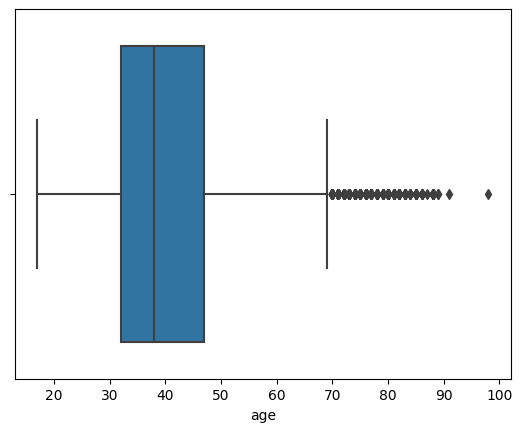

In [ ]:
# Gráfico Boxplot

sns.boxplot(x=df_banking['age']);

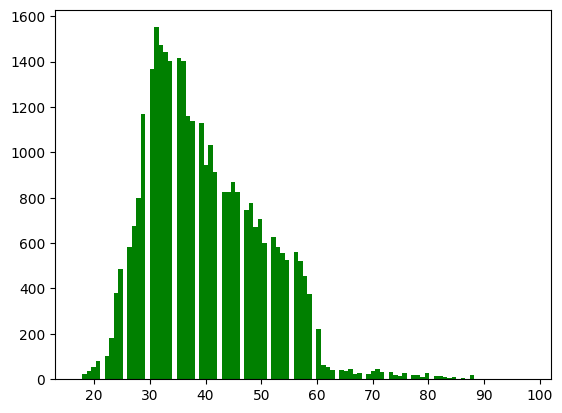

In [ ]:
# Gráfico Histograma

plt.hist(df_banking['age'], 100, facecolor='g')
plt.show()

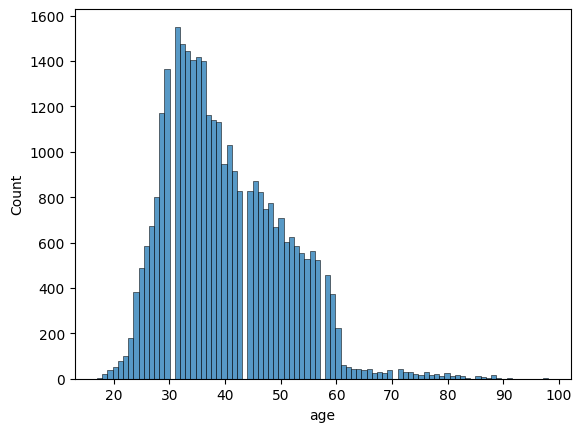

In [ ]:
# Gráfico Histograma
# Vemos uma grande concentração na faixa dos 30 a 40 anos
# Queda significativa após os 60 anos

sns.histplot(data=df_banking, x='age');

In [ ]:
# Tabela de Frequencia
# Pouco útil porque há vários valores distintos

df_banking['age'].value_counts()

31    1551
32    1474
33    1443
35    1417
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64

### 1. Duration

Description: 	last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

* Valor Mínimo: 0 segundos -> Não contatados/Não atenderam
* Valor 1º Quartil: 103 segundos (1 min 43 seg)
* Valor Mediano: 180 segundos (3 min 0 seg)
* Valor Médio: aprox. 258 segundos (4 min 18 seg)
* Valor 3º Quartil: 319 segundos (5 min 19 seg)
* Valor Máximo: 4918 segundos (81 min 58 seg)

In [ ]:
# Estatística Descritiva para esta variável
# Média distorcida pelas ligações que duraram mais

df_banking['duration'].describe()

count    32950.000000
mean       258.127466
std        258.975917
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [ ]:
# 5 primeiros resultados desta variável, se ordernados de forma crescente
# Vemos que apenas 4 clientes com valor zero

df_banking['duration'].sort_values().head()

4903     0
23638    0
1572     0
14230    0
1814     1
Name: duration, dtype: int64

In [ ]:
# 5 últimos resultados desta variável, se ordernados de forma crescente
# vemos que 4 clientes tiveram contato que durou mais de 1 hora, o quinto cliente ficou próximo

df_banking['duration'].sort_values().tail()

5396     3509
21564    3643
28144    3785
19242    4199
4770     4918
Name: duration, dtype: int64

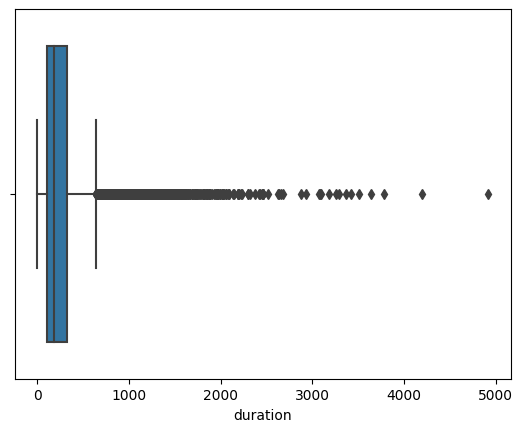

In [ ]:
# Gráfico Boxplot

# Valor mínimo: 0 segundos
# Valor máximo: 643 segundos
# Outliers: todas as ligações acima de 10'43'' são outliers segundo o gráfico

sns.boxplot(x=df_banking['duration']);

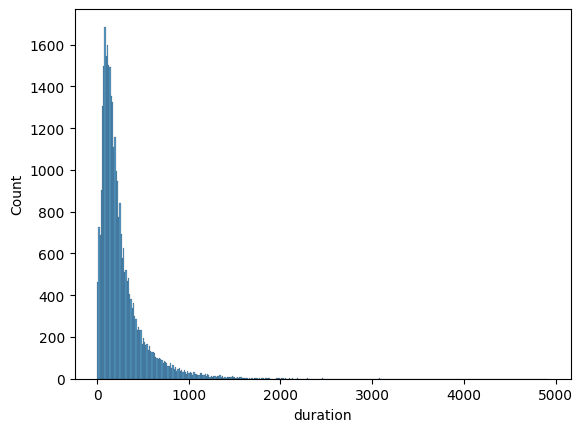

In [ ]:
# Gráfico Histograma

sns.histplot(data=df_banking, x='duration');

In [ ]:
# Tabela de Frequencia
# Pouco útil porque há vários valores distintos

df_banking['duration'].value_counts()

90      147
124     139
136     138
85      137
97      133
       ... 
1285      1
2203      1
1848      1
1248      1
1434      1
Name: duration, Length: 1467, dtype: int64

### 2. Campaign

Description: number of contacts performed during this campaign and for this client (includes last contact)

* Valor Mínimo: 1 contato -> aparentemente todos foram contatados, então quem está zerado no em 'Duration' não atendeu a ligação
* Valor 1º Quartil: 1 contato
* Valor Mediano: 2 contatos
* Valor Médio: aprox. 2 contatos e meio
* Valor 3º Quartil: 3 contatos
* Valor Máximo: 56 contatos

In [ ]:
# Estatística Descritiva para esta variável

df_banking['campaign'].describe()

count    32950.000000
mean         2.560607
std          2.752326
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [ ]:
# 5 primeiros resultados desta variável, se ordernados de forma crescente
# Não é útil porque há vários clientes com uma ligação

df_banking['campaign'].sort_values().head()

28310    1
13729    1
13730    1
27592    1
27590    1
Name: campaign, dtype: int64

In [ ]:
# 5 últimos resultados desta variável, se ordernados de forma crescente
# vemos que os 5 últimos clientes tiveram mais de 40 contatos cada um

df_banking['campaign'].sort_values().tail()

20912    42
13314    42
800      43
4937     43
30176    56
Name: campaign, dtype: int64

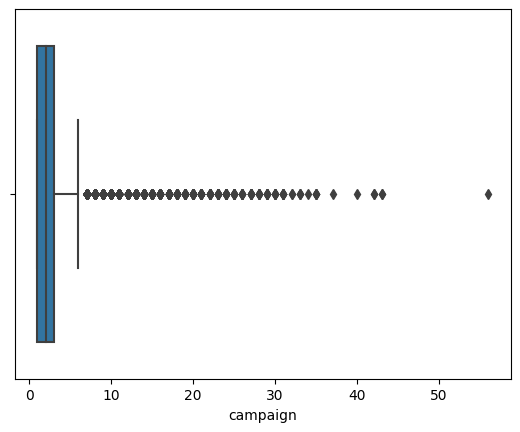

In [ ]:
# Gráfico Boxplot

# Valor mínimo: 0 contatos -> apesar de não haver
# Valor máximo: 6 contatos
# Outliers: todas os clientes com 7 ou mais contatos

sns.boxplot(x=df_banking['campaign']);

In [ ]:
len(df_banking[df_banking['campaign'] < 7])/len(df_banking)

0.9418512898330804

In [ ]:
# Tabela de Frequencia
# Análise significativa para esta variável, vemos que 94% dos clientes (somatório de clientes com 0 a 6 contatos dividido pelo total) estão dentro dos limites do boxplot (0 a 6 contatos)

df_banking['campaign'].value_counts()

1     14121
2      8469
3      4300
4      2116
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: campaign, dtype: int64

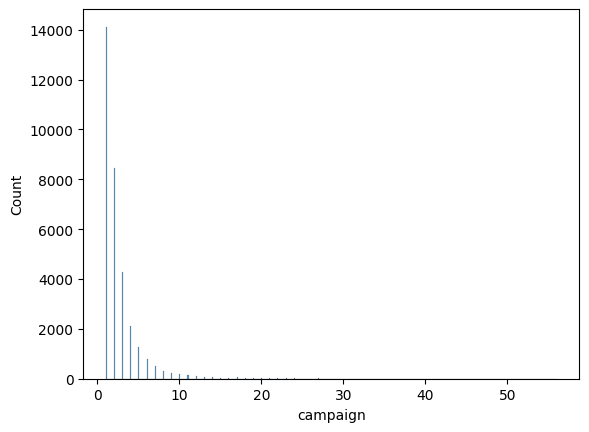

In [ ]:
# Gráfico Histograma

# Altíssima concentração até 6 contatos

sns.histplot(data=df_banking, x='campaign');

### 3. pdays

Description: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

* Valor Mínimo: 0 dias -> Não foram contatados por uma campanha anterior
* Valor Médio: aprox. 962 dias -> distorcido
* Valor 1º Quartil: 999 -> pelo menos 75% dos clientes não foram contatados anteriormente para outra campanha
* Valor Mediano: 999
* Valor 3º Quartil: 999
* Valor Máximo: 999

In [ ]:
# Estatística Descritiva para esta variável

df_banking['pdays'].describe()

count    32950.000000
mean       962.052413
std        187.951096
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [ ]:
# 5 primeiros resultados desta variável, se ordernados de forma crescente
# Não é útil porque há vários clientes em que o último contato foi no dia atual

df_banking['pdays'].sort_values().head()

1766     0
32863    0
22753    0
15967    0
25243    0
Name: pdays, dtype: int64

In [ ]:
# 5 últimos resultados desta variável, se ordernados de forma crescente
# Muitos clientes não foram contatados por uma campanha anterior

df_banking['pdays'].sort_values().tail()

11175    999
11174    999
11173    999
11186    999
32949    999
Name: pdays, dtype: int64

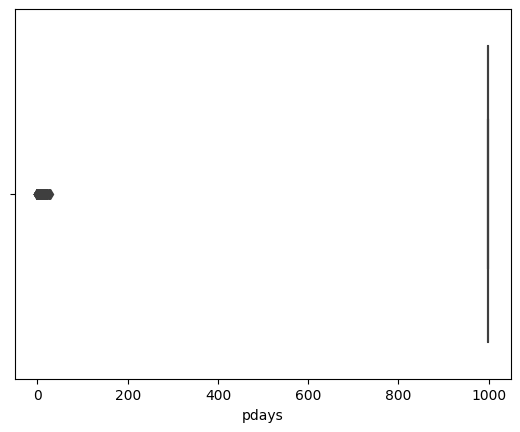

In [ ]:
# Gráfico Boxplot

# Bastante distorcido, não há como extrair valores significativos nesta visão

sns.boxplot(x=df_banking['pdays']);

In [ ]:
len(df_banking[df_banking['pdays'] == 999])/len(df_banking)

0.9627921092564492

In [ ]:
# Tabela de Frequencia
# 96% dos clientes não foram contatados por nenhuma campanha anterior

df_banking['pdays'].value_counts()

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

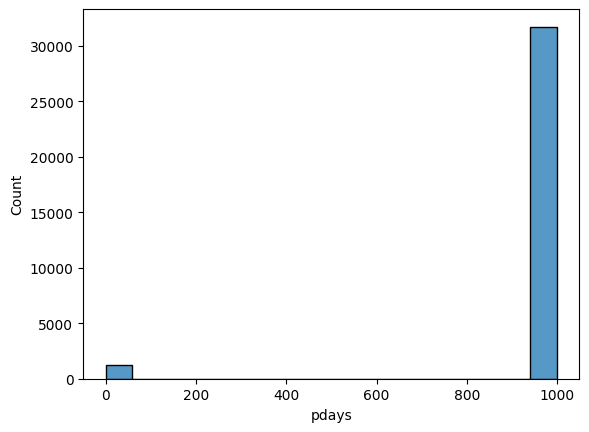

In [ ]:
# Gráfico Histograma

# Como o valor para representar o não contato é alto, não torna essa visão útil, não permite a visualização da nuance dos dados

sns.histplot(data=df_banking, x='pdays');

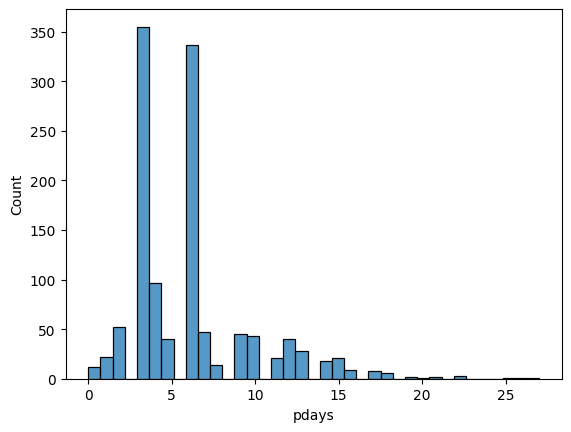

In [ ]:
# Excluindo esta distorção de 999 dias

# alta concentração de 3 e 7 dias atrás, averiguar se há algum dia preferido na semana para ligar

sns.histplot(data=df_banking[df_banking['pdays'] < 999], x='pdays');

### 4. previous

Description: number of contacts performed before this campaign and for this client

* Valor Mínimo: 0 contatos -> Não foram contatados por uma campanha anterior
* Valor Médio: aprox. 0 contatos -> distorcido
* Valor 1º Quartil: 0 contatos -> pelo menos 75% dos clientes não foram contatados anteriormente para outra campanha
* Valor Mediano: 0
* Valor 3º Quartil: 0
* Valor Máximo: 7 contatos

In [ ]:
# Estatística Descritiva para esta variável

df_banking['previous'].describe()

count    32950.000000
mean         0.174719
std          0.499025
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [ ]:
# 5 primeiros resultados desta variável, se ordernados de forma crescente
# Não é útil porque há vários clientes que não foram contatados

df_banking['previous'].sort_values().head()

0        0
21144    0
21143    0
21142    0
21141    0
Name: previous, dtype: int64

In [ ]:
# 5 últimos resultados desta variável, se ordernados de forma crescente
# 6 clientes receberam mais de 5 contatos

df_banking['previous'].sort_values().tail(10)

13480    5
14116    5
28882    5
31013    5
15239    6
9834     6
18799    6
16391    6
1346     6
5224     7
Name: previous, dtype: int64

In [ ]:
# Apenas 13% dos clientes da base foram contatados anteriormente para alguma campanha

len(df_banking[df_banking['previous']>0])/len(df_banking)

0.13760242792109256

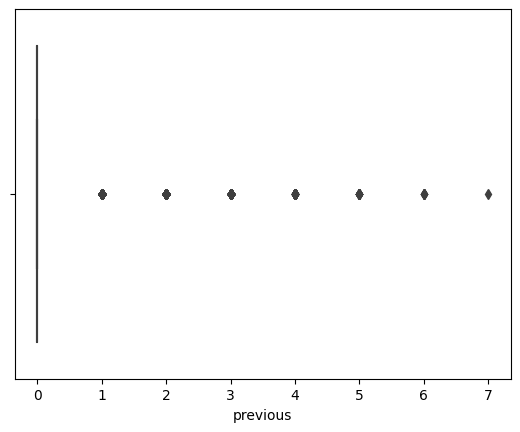

In [ ]:
# Gráfico Boxplot

# Bastante distorcido, todo cliente contatado é um outlier

# Valor mínimo: 0 contatos
# Valor máximo: 0 contatos
# Outliers: todos os clientes com 1 ou mais contatos

sns.boxplot(x=df_banking['previous']);

In [ ]:
(len(df_banking[df_banking['previous']==0])/len(df_banking))*100

86.23975720789075

In [ ]:
# Tabela de Frequencia
# 86% dos clientes não foram contatados por nenhuma campanha anterior
# Analisar de forma bivariada previous x pdays, olhando separadamente está deixando em dúvida o percentual sem contato anterior

df_banking['previous'].value_counts()

0    28416
1     3673
2      606
3      175
4       60
5       14
6        5
7        1
Name: previous, dtype: int64

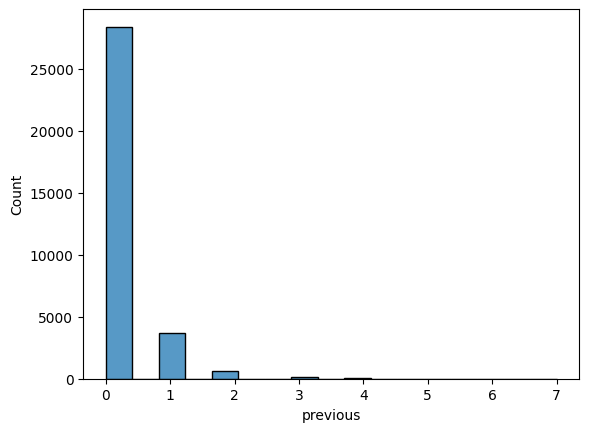

In [ ]:
# Gráfico Histograma

# Muitos clientes concentrados no valor zero, conforme vimos anteriormente

sns.histplot(data=df_banking, x='previous');

## Análise Univariada pt.2

**Variáveis Categóricas**

### 5. Job

Description: type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

In [ ]:
# Estatística Descritiva para esta variável
# 12 tipos de trabalhos distintos

df_banking['job'].describe()

count      32950
unique        12
top       admin.
freq        8314
Name: job, dtype: object

In [ ]:
(len(df_banking[df_banking['job']=='unknown'])/len(df_banking))*100

0.8042488619119879

In [ ]:
(len(df_banking[df_banking['job']=='unemployed'])/len(df_banking))*100

2.4218512898330804

In [ ]:
# Tabela de Frequencia
# 265 clientes sem informação (0,80%)
# 798 clientes desempregados (2,42%)

df_banking['job'].value_counts()

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

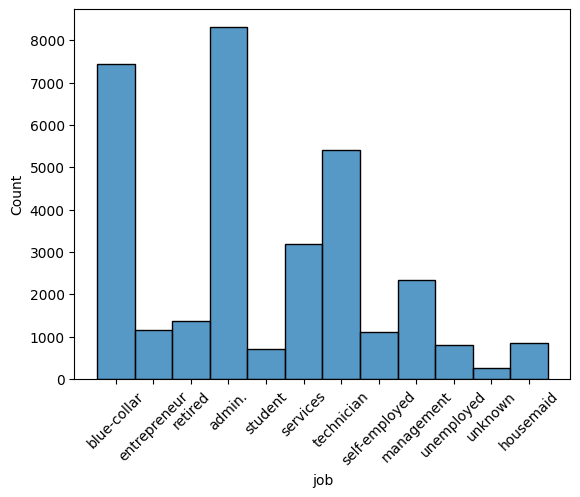

In [ ]:
# Gráfico Histograma

# 3 empregos se destacam:
# admin
# blue-collar
# technician

ax = sns.histplot(data=df_banking, x='job')
plt.xticks(rotation=45)
plt.show()

### 6. marital

Description: marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

In [ ]:
# Estatística Descritiva para esta variável
# 4 tipos de estados civis distintos

df_banking['marital'].describe()

count       32950
unique          4
top       married
freq        19953
Name: marital, dtype: object

In [ ]:
# Tabela de Frequencia
# 60,56% dos clientes são casados
# 28,09% dos clientes são solteiros
# 11,15% dos clientes são divorciados ou viúvos
# 65 clientes não sabemos qual o estado civil, representa apenas 0,20%

df_banking['marital'].value_counts()

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

In [ ]:
print('married:', "{:.2f}%".format((len(df_banking[df_banking['marital']=='married'])/len(df_banking))*100))
print('single:', "{:.2f}%".format((len(df_banking[df_banking['marital']=='single'])/len(df_banking))*100))
print('divorced:', "{:.2f}%".format((len(df_banking[df_banking['marital']=='divorced'])/len(df_banking))*100))
print('unknown:', "{:.2f}%".format((len(df_banking[df_banking['marital']=='unknown'])/len(df_banking))*100))

married: 60.56%
single: 28.09%
divorced: 11.15%
unknown: 0.20%


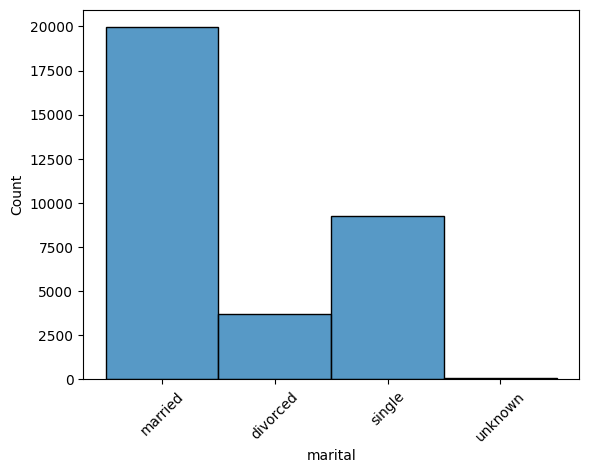

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='marital')
plt.xticks(rotation=45)
plt.show()

### 7. education

Description: ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

In [ ]:
# Estatística Descritiva para esta variável
# 8 níveis de edudação distintos
df_banking['education'].describe()

count                 32950
unique                    8
top       university.degree
freq                   9736
Name: education, dtype: object

In [ ]:
# Tabela de Frequencia
# 29,54% dos clientes possuem diploma universitário
# 23,05% dos clientes concluíram até o ensino médio
# 14,64% dos clientes concluíram até o ensino fundamental
# 1397 clientes não sabemos qual o nível de educação e representam 4,23%

df_banking['education'].value_counts()

university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64

In [ ]:
print('university.degree:', "{:.2f}%".format((len(df_banking[df_banking['education']=='university.degree'])/len(df_banking))*100))
print('high.school:', "{:.2f}%".format((len(df_banking[df_banking['education']=='high.school'])/len(df_banking))*100))
print('professional.course:', "{:.2f}%".format((len(df_banking[df_banking['education']=='professional.course'])/len(df_banking))*100))
print('basic.9y:', "{:.2f}%".format((len(df_banking[df_banking['education']=='basic.9y'])/len(df_banking))*100))
print('basic.6y:', "{:.2f}%".format((len(df_banking[df_banking['education']=='basic.6y'])/len(df_banking))*100))
print('basic.4y:', "{:.2f}%".format((len(df_banking[df_banking['education']=='basic.4y'])/len(df_banking))*100))
print('unknown:', "{:.2f}%".format((len(df_banking[df_banking['education']=='unknown'])/len(df_banking))*100))
print('illiterate:', "{:.2f}%".format((len(df_banking[df_banking['education']=='illiterate'])/len(df_banking))*100))

university.degree: 29.55%
high.school: 23.05%
professional.course: 12.72%
basic.9y: 14.65%
basic.6y: 5.66%
basic.4y: 10.08%
unknown: 4.24%
illiterate: 0.05%


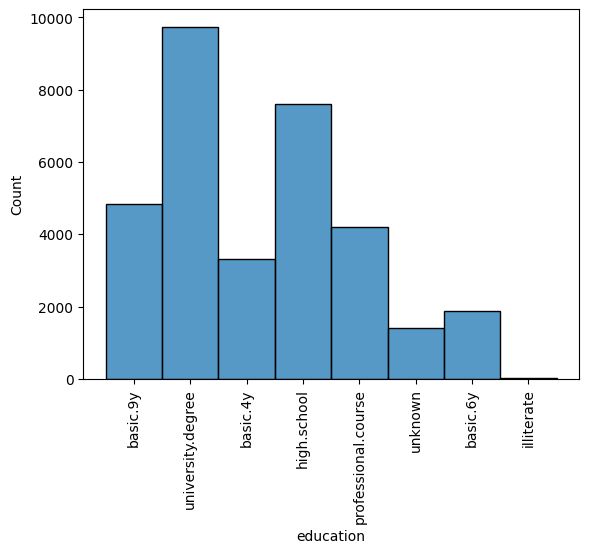

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='education')
plt.xticks(rotation=90)
plt.show()

### 8. default

Description: has credit in default? ('no','yes','unknown')

In [ ]:
# Estatística Descritiva para esta variável
# 3 valores distintos

df_banking['default'].describe()

count     32950
unique        3
top          no
freq      26007
Name: default, dtype: object

In [ ]:
# Tabela de Frequencia
# 78,93% dos clientes nunca tiveram um default
# 21,06% dos clientes não possuem dados publicados sobre este cenário
# 0,01% dos clientes tiveram um default, apenas 3 clientes

df_banking['default'].value_counts()

no         26007
unknown     6940
yes            3
Name: default, dtype: int64

In [ ]:
print('no:', "{:.2f}%".format((len(df_banking[df_banking['default']=='no'])/len(df_banking))*100))
print('unknown:', "{:.2f}%".format((len(df_banking[df_banking['default']=='unknown'])/len(df_banking))*100))
print('yes:', "{:.2f}%".format((len(df_banking[df_banking['default']=='yes'])/len(df_banking))*100))

no: 78.93%
unknown: 21.06%
yes: 0.01%


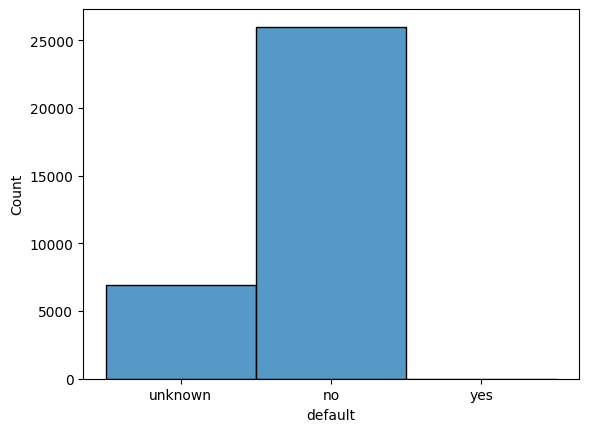

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='default')
plt.xticks(rotation=0)
plt.show()

### 9. housing

Description: has housing loan? ('no','yes','unknown')

In [ ]:
# Estatística Descritiva para esta variável
# 3 valores distintos

df_banking['housing'].describe()

count     32950
unique        3
top         yes
freq      17254
Name: housing, dtype: object

In [ ]:
# Tabela de Frequencia

df_banking['housing'].value_counts()

yes        17254
no         14900
unknown      796
Name: housing, dtype: int64

In [ ]:
print('yes:', "{:.2f}%".format((len(df_banking[df_banking['housing']=='yes'])/len(df_banking))*100))
print('no:', "{:.2f}%".format((len(df_banking[df_banking['housing']=='no'])/len(df_banking))*100))
print('unknown:', "{:.2f}%".format((len(df_banking[df_banking['housing']=='unknown'])/len(df_banking))*100))

yes: 52.36%
no: 45.22%
unknown: 2.42%


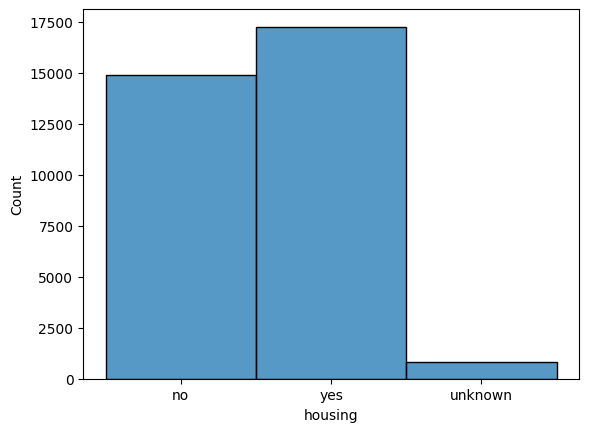

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='housing')
plt.xticks(rotation=0)
plt.show()

### 10. loan

Description: has personal loan? ('no','yes','unknown')

In [ ]:
# Estatística Descritiva para esta variável
# 3 valores distintos

df_banking['loan'].describe()

count     32950
unique        3
top          no
freq      27131
Name: loan, dtype: object

In [ ]:
# Tabela de Frequencia

df_banking['loan'].value_counts()

no         27131
yes         5023
unknown      796
Name: loan, dtype: int64

In [ ]:
print('no:', "{:.2f}%".format((len(df_banking[df_banking['loan']=='no'])/len(df_banking))*100))
print('yes:', "{:.2f}%".format((len(df_banking[df_banking['loan']=='yes'])/len(df_banking))*100))
print('unknown:', "{:.2f}%".format((len(df_banking[df_banking['loan']=='unknown'])/len(df_banking))*100))

no: 82.34%
yes: 15.24%
unknown: 2.42%


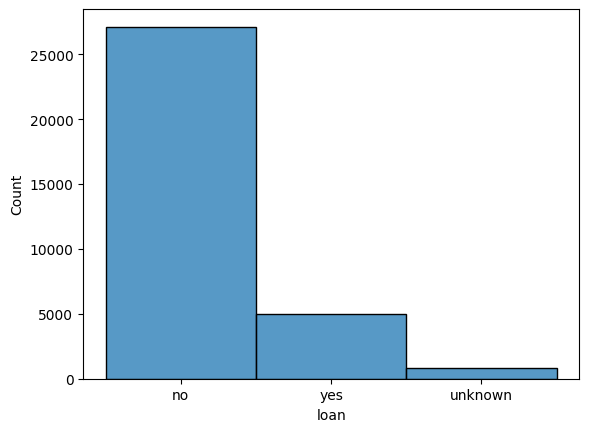

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='loan')
plt.xticks(rotation=0)
plt.show()

### 11. contact

Description: contact communication type ('cellular','telephone')

In [ ]:
# Estatística Descritiva para esta variável
# 2 valores distintos

df_banking['contact'].describe()

count        32950
unique           2
top       cellular
freq         20908
Name: contact, dtype: object

In [ ]:
# Tabela de Frequencia

df_banking['contact'].value_counts()

cellular     20908
telephone    12042
Name: contact, dtype: int64

In [ ]:
print('cellular:', "{:.2f}%".format((len(df_banking[df_banking['contact']=='cellular'])/len(df_banking))*100))
print('telephone:', "{:.2f}%".format((len(df_banking[df_banking['contact']=='telephone'])/len(df_banking))*100))

cellular: 63.45%
telephone: 36.55%


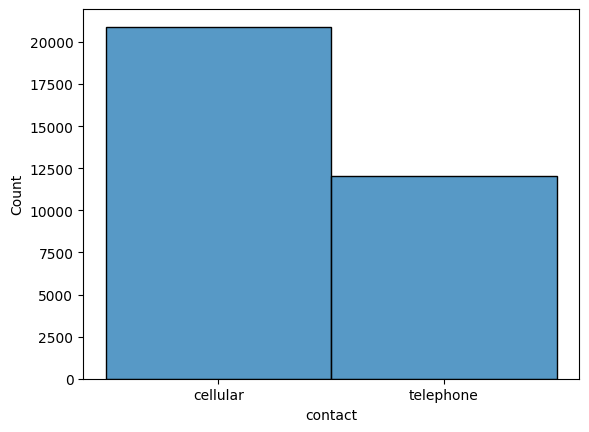

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='contact')
plt.xticks(rotation=0)
plt.show()

### 12. month

Description: last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')

In [ ]:
# Estatística Descritiva para esta variável
# 10 valores distintos

df_banking['month'].describe()

count     32950
unique       10
top         may
freq      11011
Name: month, dtype: object

In [ ]:
# Tabela de Frequencia
# Como não há uma referência temporal na base, não sei se referem ao mesmo ano mas me parece que houve o começo da campanha atual em Março até Dezembro, sendo Maio o mês de pico

df_banking['month'].value_counts()

may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64

In [ ]:
print('jan:', "{:.2f}%".format((len(df_banking[df_banking['month']=='jan'])/len(df_banking))*100))
print('feb:', "{:.2f}%".format((len(df_banking[df_banking['month']=='feb'])/len(df_banking))*100))
print('mar:', "{:.2f}%".format((len(df_banking[df_banking['month']=='mar'])/len(df_banking))*100))
print('apr:', "{:.2f}%".format((len(df_banking[df_banking['month']=='apr'])/len(df_banking))*100))
print('may:', "{:.2f}%".format((len(df_banking[df_banking['month']=='may'])/len(df_banking))*100))
print('jun:', "{:.2f}%".format((len(df_banking[df_banking['month']=='jun'])/len(df_banking))*100))
print('jul:', "{:.2f}%".format((len(df_banking[df_banking['month']=='jul'])/len(df_banking))*100))
print('aug:', "{:.2f}%".format((len(df_banking[df_banking['month']=='aug'])/len(df_banking))*100))
print('sep:', "{:.2f}%".format((len(df_banking[df_banking['month']=='sep'])/len(df_banking))*100))
print('oct:', "{:.2f}%".format((len(df_banking[df_banking['month']=='oct'])/len(df_banking))*100))
print('nov:', "{:.2f}%".format((len(df_banking[df_banking['month']=='nov'])/len(df_banking))*100))
print('dec:', "{:.2f}%".format((len(df_banking[df_banking['month']=='dec'])/len(df_banking))*100))

jan: 0.00%
feb: 0.00%
mar: 1.32%
apr: 6.33%
may: 33.42%
jun: 12.89%
jul: 17.49%
aug: 15.02%
sep: 1.41%
oct: 1.78%
nov: 9.91%
dec: 0.43%


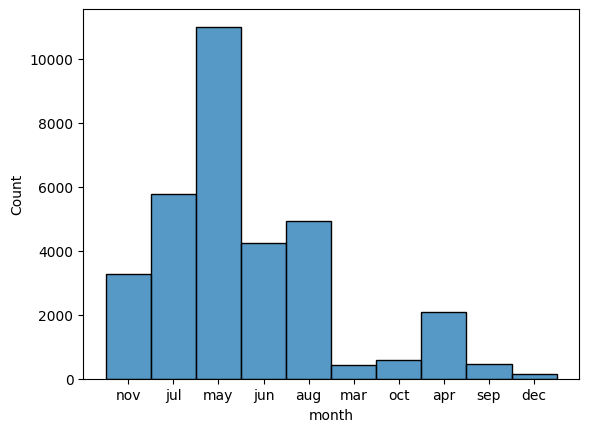

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='month')
plt.xticks(rotation=0)
plt.show()

### 13. day_of_week

Description: last contact day of the week ('mon','tue','wed','thu','fri')

In [ ]:
# Estatística Descritiva para esta variável
# 5 valores distintos

df_banking['day_of_week'].describe()

count     32950
unique        5
top         thu
freq       6857
Name: day_of_week, dtype: object

In [ ]:
# Tabela de Frequencia
# valores mt próximos, não nos gera nenhum insight a princípio, tentar vincular com Y pra ver se existe uma maior conversão em algum dia da semana
df_banking['day_of_week'].value_counts()

thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: day_of_week, dtype: int64

In [ ]:
print('mon:', "{:.2f}%".format((len(df_banking[df_banking['day_of_week']=='mon'])/len(df_banking))*100))
print('tue:', "{:.2f}%".format((len(df_banking[df_banking['day_of_week']=='tue'])/len(df_banking))*100))
print('wed:', "{:.2f}%".format((len(df_banking[df_banking['day_of_week']=='wed'])/len(df_banking))*100))
print('thu:', "{:.2f}%".format((len(df_banking[df_banking['day_of_week']=='thu'])/len(df_banking))*100))
print('fri:', "{:.2f}%".format((len(df_banking[df_banking['day_of_week']=='fri'])/len(df_banking))*100))

mon: 20.67%
tue: 19.56%
wed: 19.77%
thu: 20.81%
fri: 19.19%


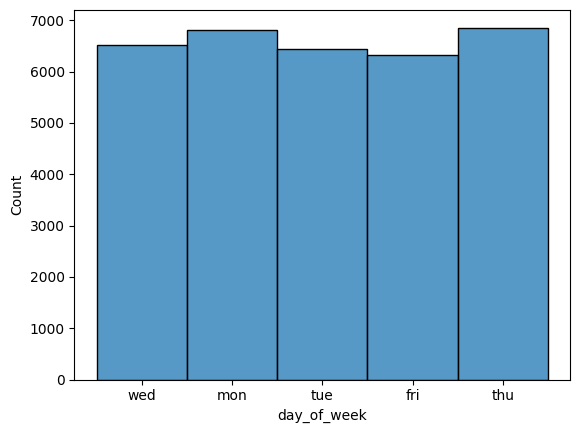

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='day_of_week')
plt.xticks(rotation=0)
plt.show()

### 14. poutcome

Description: outcome of the previous marketing campaign ('failure','nonexistent','success')

In [ ]:
# Estatística Descritiva para esta variável
# 3 valores distintos

df_banking['poutcome'].describe()

count           32950
unique              3
top       nonexistent
freq            28416
Name: poutcome, dtype: object

In [ ]:
# Tabela de Frequencia
# 86,24% não tiveram contato em campanha anterior
# 10,41% não converteram
# 3,35% converteram

df_banking['poutcome'].value_counts()

nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64

In [ ]:
print('nonexistent:', "{:.2f}%".format((len(df_banking[df_banking['poutcome']=='nonexistent'])/len(df_banking))*100))
print('failure:', "{:.2f}%".format((len(df_banking[df_banking['poutcome']=='failure'])/len(df_banking))*100))
print('success:', "{:.2f}%".format((len(df_banking[df_banking['poutcome']=='success'])/len(df_banking))*100))

nonexistent: 86.24%
failure: 10.41%
success: 3.35%


Encontramos qual é a proporção de sucesso e de falha dos clientes com campanhas anteriores, interessante buscar entender dos clientes que tiveram alguma interação anterior, qual foi o resultado:

In [ ]:
# Definindo quais são os clientes que tiveram alguma interação -> excluir que não teve

existent = df_banking[(df_banking['poutcome']=='failure') | (df_banking['poutcome']=='success')]

$$P = (failure|existent)$$

In [ ]:
print('P(failure|existent):', "{:.2f}%".format((len(df_banking[df_banking['poutcome']=='failure'])/len(existent))*100))

P(failure|existent): 75.63%




$$P = (success|existent)$$

In [ ]:
print('P(success|existent):', "{:.2f}%".format((len(df_banking[df_banking['poutcome']=='success'])/len(existent))*100))

P(success|existent): 24.37%


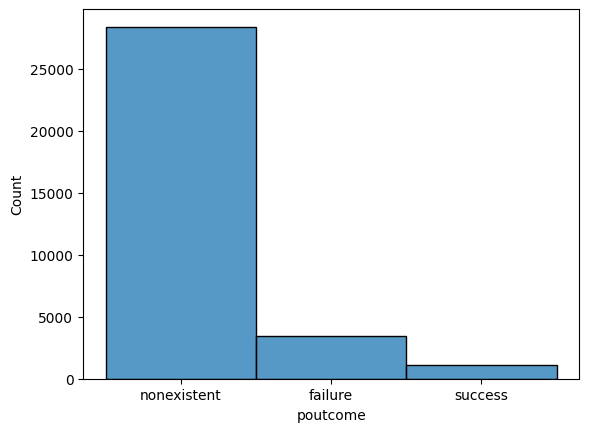

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='poutcome')
plt.xticks(rotation=0)
plt.show()

### 15. y

Description: has the client subscribed a term deposit? ('yes','no')

In [ ]:
# Estatística Descritiva para esta variável
# 3 valores distintos -> Parece ter um elemento de sujeira

df_banking['y'].describe()

count     32950
unique        2
top          no
freq      29238
Name: y, dtype: object

In [ ]:
# Tabela de Frequencia
# 88,73% não
# 11,27% sim

df_banking['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [ ]:
print('no:', "{:.2f}%".format((len(df_banking[df_banking['y']=='no'])/len(df_banking))*100))
print('yes:', "{:.2f}%".format((len(df_banking[df_banking['y']=='yes'])/len(df_banking))*100))

no: 88.73%
yes: 11.27%


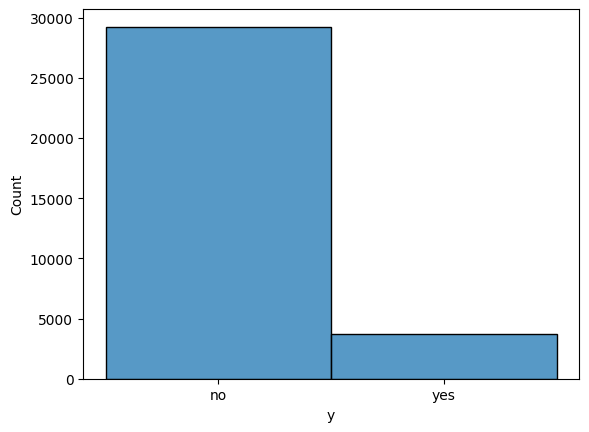

In [ ]:
# Gráfico Histograma

ax = sns.histplot(data=df_banking, x='y')
plt.xticks(rotation=0)
plt.show()

## Análise Bivariada

Como temos mais de 100 combinações de pares distintos, vamos buscar entender quais nos chamaram mais atenção na análise univariada

### Variáveis Numéricas - Pares

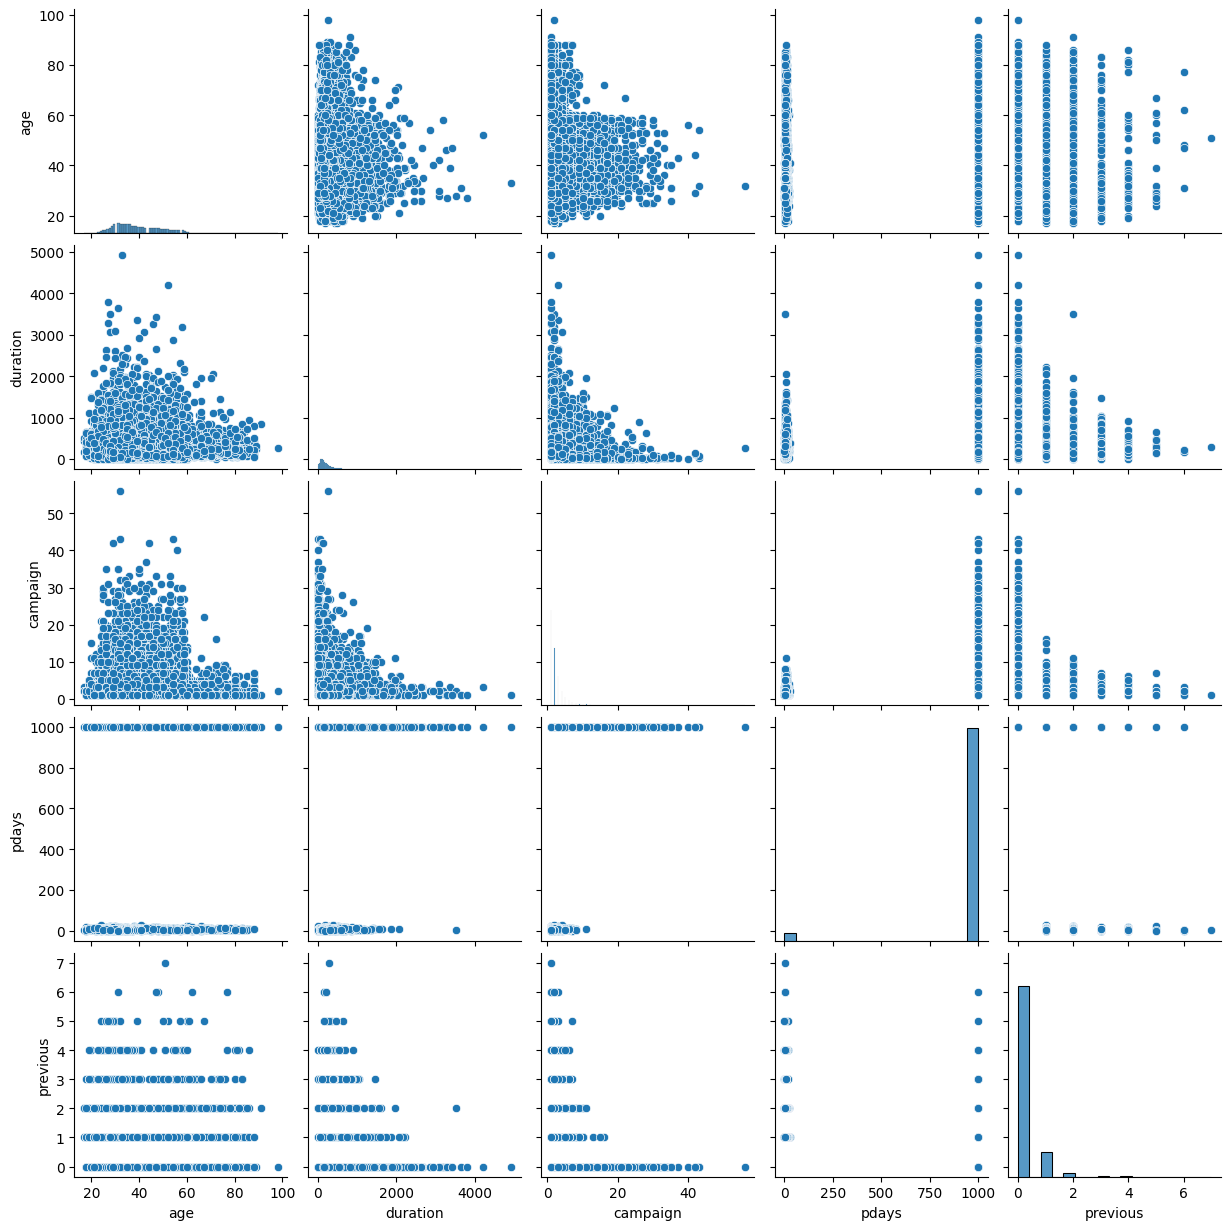

In [ ]:
sns.pairplot(df_banking)

In [ ]:
df_banking.corr()

<ipython-input-234-77f37c884868>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_banking.corr()


,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


<ipython-input-235-b6a71f58076a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_banking.corr(), annot=True, fmt='f')


<Axes: >

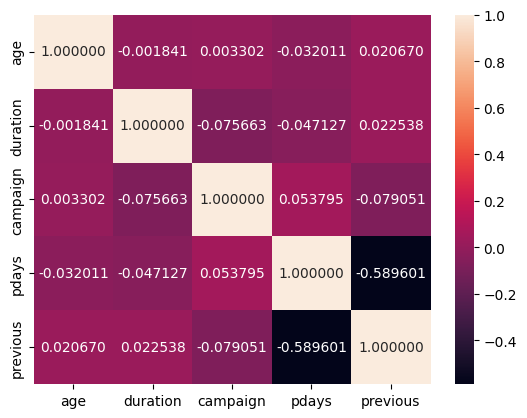

In [ ]:
# pdays e previous me parecem ter uma alta correlação inversa e as demais, ficam todas mt próximas do zero

sns.heatmap(df_banking.corr(), annot=True, fmt='f')

### Par 1 - Duration_y

In [ ]:
# Tabela de Frequência

duration_y = pd.crosstab(index=df_banking['previous'], columns=df_banking['y'], margins = True)

duration_y

y,n,no,yes,All
previous,,,,
0,1,18530,1772,20303
1,0,2049,542,2591
2,0,243,205,448
3,0,51,71,122
4,0,20,23,43
5,0,3,9,12
6,0,2,3,5
7,0,1,0,1
All,1,20899,2625,23525


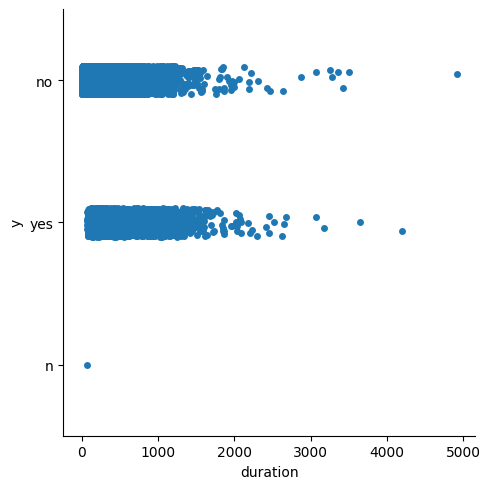

In [ ]:
# Gráfico de Categóricas

sns.catplot(x='duration', y='y', data=df_banking)

<Axes: xlabel='duration', ylabel='y'>

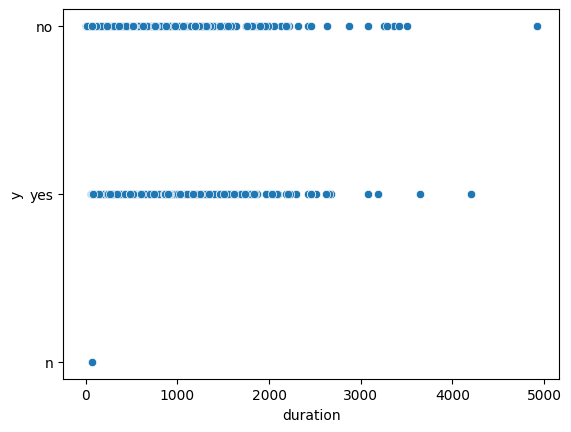

In [ ]:
# Gráfico de Dispersão

sns.scatterplot(data=df_banking, x='duration', y='y')

### Par 2 - pdays_previous

In [ ]:
# Tabela de Frequência

pdays_previous = pd.crosstab(index=df_banking['pdays'], columns=df_banking['previous'], margins = True)

pdays_previous

previous,0,1,2,3,4,5,6,7,All
pdays,,,,,,,,,
0,0,5,4,1,1,1,0,0,12
1,0,12,5,3,1,0,1,0,22
2,0,37,10,2,3,0,0,0,52
3,0,202,95,33,13,8,3,1,355
4,0,61,22,12,2,0,0,0,97
5,0,26,9,4,0,1,0,0,40
6,0,178,93,48,16,2,0,0,337
7,0,22,17,6,2,0,0,0,47
8,0,6,5,2,1,0,0,0,14


<Axes: xlabel='pdays', ylabel='previous'>

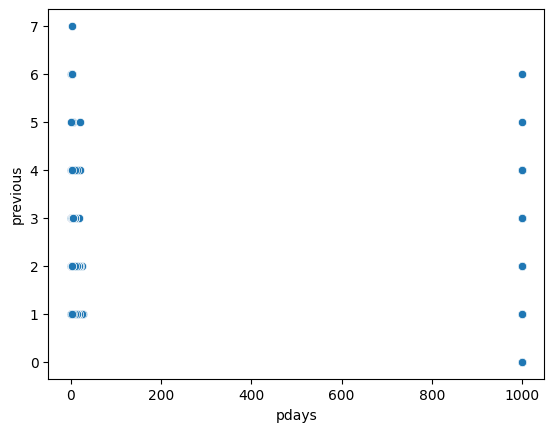

In [ ]:
# Gráfico de Dispersão

sns.scatterplot(data=df_banking, x='pdays', y='previous')

##Análise Multivariada

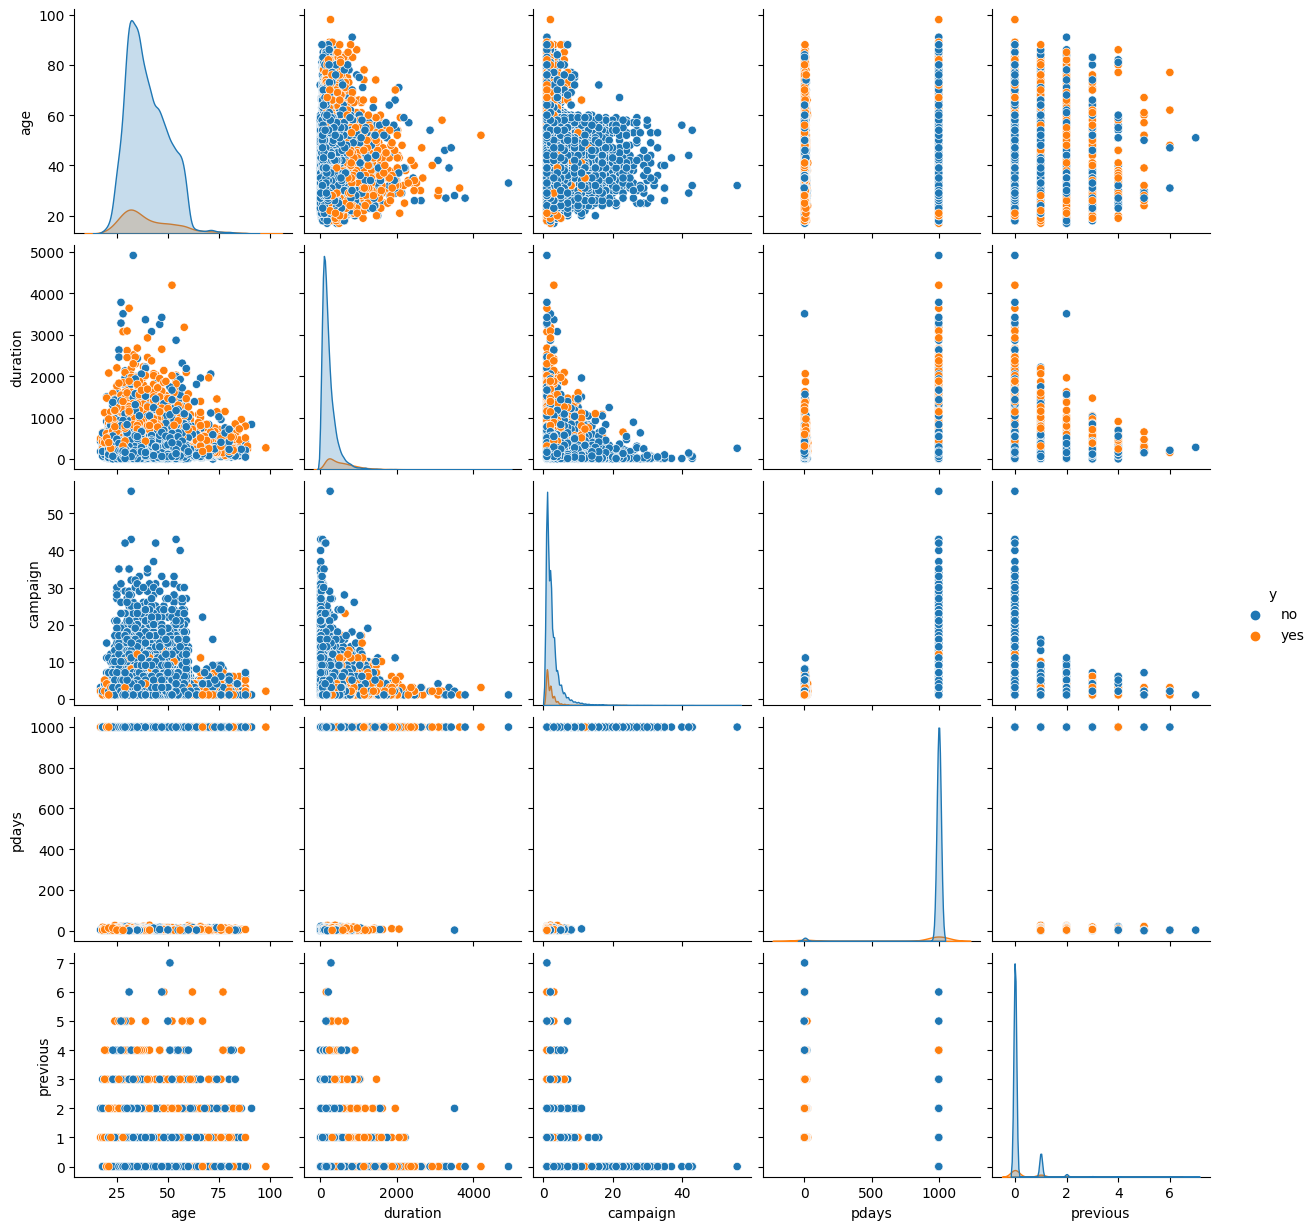

In [ ]:
# Analisando este por este gráfico não é fácil de encontrar visualmente relações que separem confortavelmente os dois grupos

sns.pairplot(df_banking, hue='y')

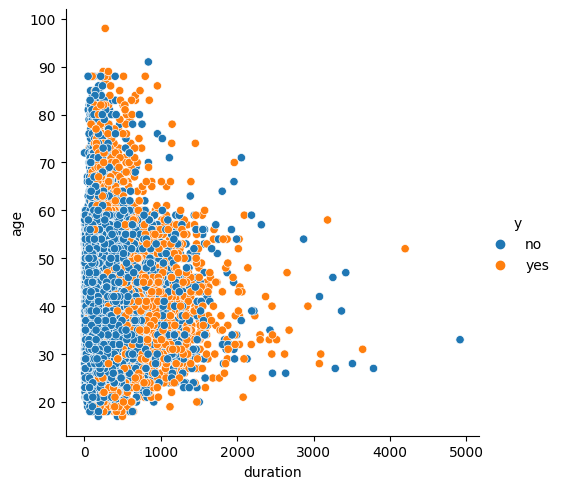

In [ ]:
# Visualmente nos dá a impressão que quanto mais tempo passa ao longo do contato, o cliente está mais inclinado a realizar o depósito.
# Primeiro ponto de atenção, podemos estar enviesados onde apenas os clientes que já gostariam de realizar o depósito estão permitindo que o contato se alongue.

sns.relplot(x='duration', y='age', hue='y', data=df_banking)

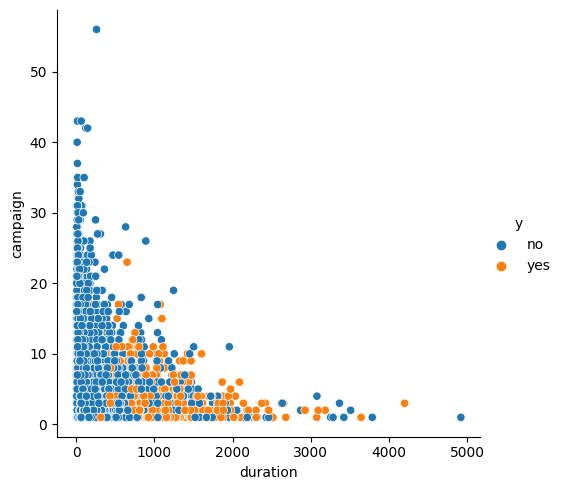

In [ ]:
# Ligar mais vezes para o mesmo cliente não está surgindo o efeito desejado, me parece que acima de 10x já tende a ter o não como resultado.

sns.relplot(x='duration', y='campaign', hue='y', data=df_banking)